## Homework 4
### Mathematical & Computational Modeling of Infectious Diseases
#### Caleb Cordsen

In [1]:
# Import numpy for linspace and matplotlib 
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import fsolve
from scipy.stats import nbinom
import csv
import random
from scipy.stats import linregress

#### <u>Problem 3</u>

In [2]:
posSamples = []
negSamples = []
genData = []
# This source was used for help reading csv's https://www.geeksforgeeks.org/reading-rows-from-a-csv-file-in-python/
with open('HW4_Q3_pos.csv','r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        posSamples.append(float(row[0]))
with open('HW4_Q3_neg.csv','r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        negSamples.append(float(row[0]))
with open('HW4_Q3_data.csv','r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        genData.append(float(row[0]))

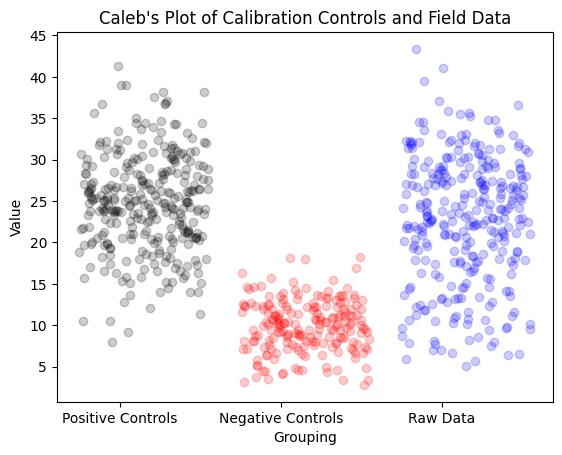

In [3]:
posSampleX = []
negSampleX = []
genDataX = []
for i in posSamples:
    posSampleX.append(1+random.uniform(0,.8)-0.25)
for i in negSamples:
    negSampleX.append(2+random.uniform(0,.8)-0.25)
for i in genData:
    genDataX.append(3+random.uniform(0,.8)-0.25)
plt.scatter(posSampleX,posSamples,color='black',alpha=0.2)
plt.scatter(negSampleX,negSamples,color='red',alpha=0.2)
plt.scatter(genDataX,genData,color='blue',alpha=0.2)
plt.title("Caleb's Plot of Calibration Controls and Field Data")
plt.xlabel('Grouping')
plt.ylabel('Value')
plt.xticks([1,2,3])
plt.gca().set_xticklabels(['Positive Controls', 'Negative Controls', 'Raw Data'])
plt.show()

In [4]:
# This function takes in a cutoff c and a list of positive assay control values.
# It then calculates the sensitivy given the cutoff. It does so by looping the list
# counting all the identified positives and then returning that divided by the length of the list
def se(c,posControls):
    identPosCounter = 0
    for i in posControls:
        # Positives are greater than cutoff
        if i > c:
            identPosCounter += 1
    return identPosCounter/len(posControls)

In [5]:
se(-1,posSamples) # Choosing a low cutoff should return se of 1

1.0

In [6]:
# This function takes in a cutoff c and a list of negative assay control values.
# It then calculates the specificity given the cutoff. It does so by looping the list
# counting all the identified negatives and then returning that divided by the length of the list
def sp(c,negControls):
    identNegCounter = 0
    for i in negControls:
        # Negatives are lower than cutoff
        if i < c:
            identNegCounter += 1
    return identNegCounter/len(negControls)

In [7]:
sp(1000,negSamples) # Choosing a high cut off should return a sp of 1

1.0

In [8]:
# This function takes in a cutoff c and a list of data. It then figures out the raw prevalence
# by identifying all the positives and returning positives count / total count as shown in lecture notes.
def rawPrevalence(c,data):
    identPosCounter = 0
    for i in data:
        if i > c:
            identPosCounter += 1
    return identPosCounter/len(data)

In [9]:
rawPrevalence(10000,genData)

0.0

In [10]:
# This function takes in a cutoff, a positive control list, a negative control list and field data 
# Then returns the prevalence corrected for specificity and sensitivty according to the equation
# from class
def correctPrevalence(c,posControls,negControls,data):
    sen = se(c,posControls)
    spec = sp(c,negControls)
    rawPrev = rawPrevalence(c,data)
    num = rawPrev - (1-spec)
    denom = sen + spec - 1
    return num/denom

In [11]:
# Youden choice. Presupposes overlap in the data
def findYouden(posControls,negControls):
    # I minus 1 and add 1 to the min's and max's just to be sure about range
    # These are used to determine the range of C's worth covering since a c value at the maxNeg will have sp = 1
    # and a c value at min pos will have a se = 1.
    minPos = min(posControls)-1
    maxNeg = max(negControls)+1
    YoudenMax = -1000
    testC = minPos
    c = -1000
    # Test multiple C's. If the youden value it produces is higher than the youden max stored, set that c to the c we want
    # to eventually return and the youdenmax to that youden value. Basically it will maximize the youden function with choices of
    # c. 
    while testC<maxNeg:
        currYouden = se(testC,posControls) + sp(testC,negControls) - 1
        if currYouden > YoudenMax:
            c = testC
            YoudenMax = currYouden
        # Six decimals took 2 minutes and 46 seconds to run
        # Five decimals took around 20 seconds to run
        # To preserve future people's work I will keep it at 5 decimals but I used six to determine my number in the homework
        testC+=0.00001
    return c

In [12]:
# Six decimal youden choice 14.756939570289505
findYouden(posSamples,negSamples)

14.756942575049273

In [13]:
# Walk through values of c, calculate True positive rates and false positive rates and then plot as an ROC curve. Also calculate corrected prevalence for c value
currentC = min(posSamples)-1
FPRate = []
TPRate = []
cValues = []
corrPrevValues = []
while currentC<max(negSamples)+1:
    TPRate.append(se(currentC,posSamples))
    FPRate.append(1-sp(currentC,negSamples))
    cValues.append(currentC)
    corrPrevValues.append(correctPrevalence(currentC,posSamples,negSamples,genData))
    currentC += 0.00001
youdenTPRate = [se(14.756942575049273,posSamples)]
youdenFPRate = [1-sp(14.756942575049273,negSamples)]

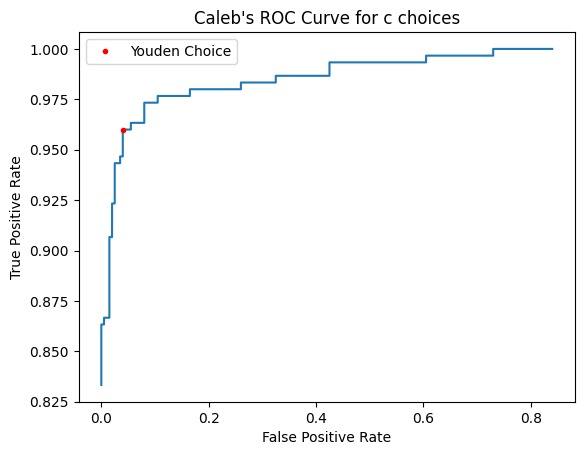

In [14]:
plt.plot(FPRate,TPRate)
plt.plot(youdenFPRate,youdenTPRate,"r.",label="Youden Choice")
plt.title("Caleb's ROC Curve for c choices")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

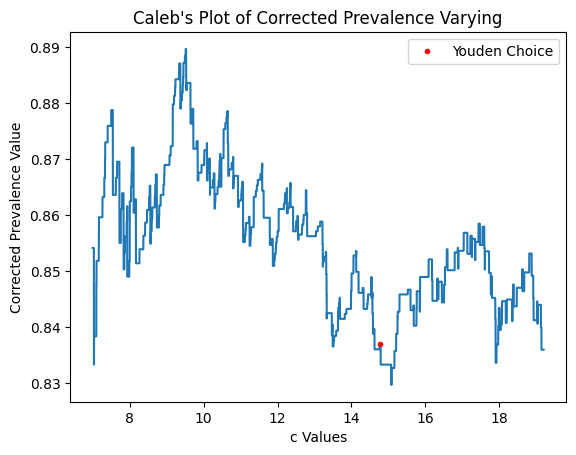

In [15]:
plt.plot(cValues,corrPrevValues)
plt.plot(14.756942575049273,correctPrevalence(14.756942575049273,posSamples,negSamples,genData),"r.",label="Youden Choice")
plt.title("Caleb's Plot of Corrected Prevalence Varying")
plt.xlabel('c Values')
plt.ylabel('Corrected Prevalence Value')
plt.legend()
plt.show()

In [16]:
se(14.756942575049273,posSamples) + sp(14.756942575049273,negSamples) - 1

0.9199999999999999

#### <u>Problem 1A</u>

In [17]:
# This converts weekly new cases to total active infections by accounting for testing not capturing all cases, recovery and accumulation
def totalActiveInfections(newCases):
    InfectionList = []
    for index,value in enumerate(newCases):
        if(index==0):
            InfectionList.append(value*10)
        elif index==1:
            InfectionList.append(value*10+InfectionList[index-1])
        else:
            InfectionList.append(value*10+InfectionList[index-1]-(newCases[index-2]*10))
    return InfectionList

In [18]:
# Read in the data
week = []
newCases = []
with open('all_weeks.csv','r') as file:
    csv_reader = csv.reader(file)
    counter = 0
    for row in csv_reader:
        if counter == 0:
            counter+=1
        else:
            week.append(int(row[0]))
            newCases.append(int(row[1]))

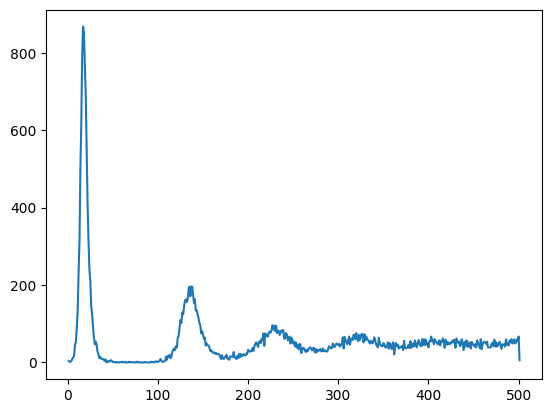

In [19]:
plt.plot(week,newCases)

In [20]:
totalInfectionsAtTimeT = totalActiveInfections(newCases)

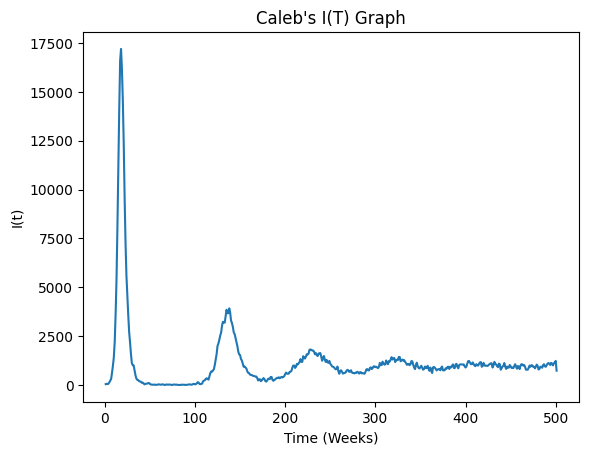

In [21]:
plt.plot(week,totalInfectionsAtTimeT)
plt.xlabel("Time (Weeks)")
plt.ylabel("I(t)")
plt.title("Caleb's I(T) Graph")
plt.show()

Based on the plots we can see that the max occurs in the first exponential growth. From here I will find the max infection count and then pull from the start of the list to that index.

In [22]:
max(totalInfectionsAtTimeT)

17200

In [23]:
totalInfectionsAtTimeT.index(17200)

17

In [24]:
exponentialGrowth = totalInfectionsAtTimeT[0:18]

In [25]:
exponentialGrowth

[40,
 60,
 40,
 60,
 130,
 220,
 300,
 620,
 980,
 1410,
 2210,
 3620,
 5420,
 8080,
 11100,
 14070,
 16600,
 17200]

This represents the initial exponential growth and will be what I work with to estimate the slope

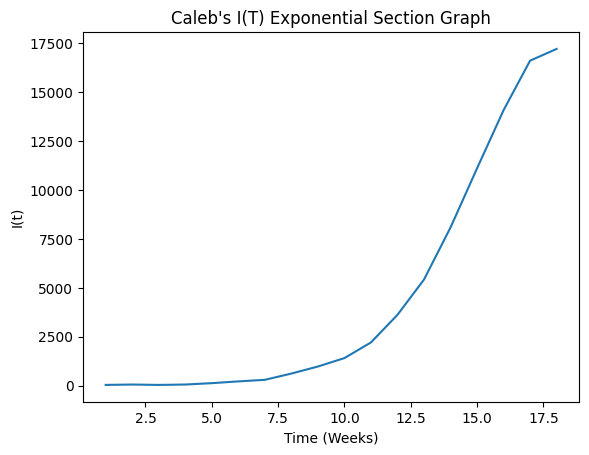

In [26]:
plt.plot(week[0:18],exponentialGrowth)
plt.xlabel("Time (Weeks)")
plt.ylabel("I(t)")
plt.title("Caleb's I(T) Exponential Section Graph")
plt.show()

That roughly tracks with what we want. From class I will transform using log

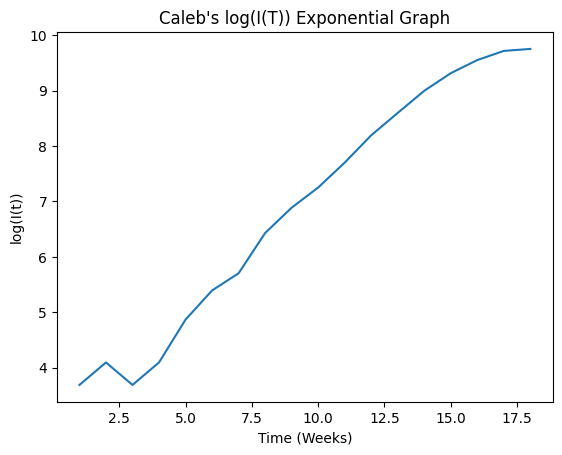

In [27]:
plt.plot(week[0:18],np.log(exponentialGrowth))
plt.xlabel("Time (Weeks)")
plt.ylabel("log(I(t))")
plt.title("Caleb's log(I(T)) Exponential Graph")
plt.show()

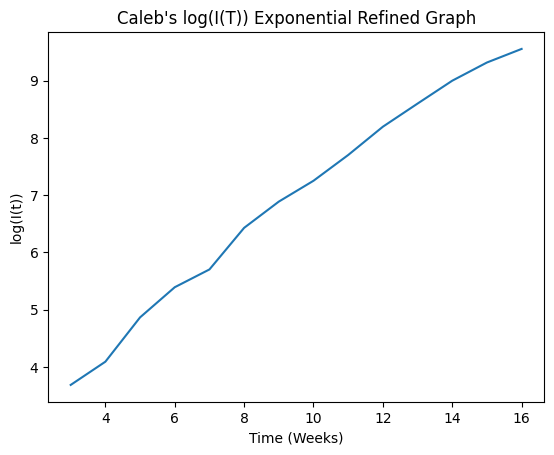

In [28]:
# Because of the little bump at the beginning I also decided to start on week 3 and end at week 16
plt.plot(week[2:16],np.log(exponentialGrowth[2:16]))
plt.xlabel("Time (Weeks)")
plt.ylabel("log(I(t))")
plt.title("Caleb's log(I(T)) Exponential Refined Graph")
plt.show()

While not perfectly straight this will have to do to represent our exponential growth

In [29]:
# To estimate slope I consulted this stack overflow post 
# https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy
linregress(week[2:16],np.log(exponentialGrowth[2:16]))

LinregressResult(slope=0.4612463160040418, intercept=2.5233929553591334, rvalue=0.9957100911817649, pvalue=8.916300068930865e-14, stderr=0.012373202942786113, intercept_stderr=0.12769001561691895)

In [30]:
len(week[2:16])

14